# Sources
 On Subplots
 
 https://www.kaggle.com/asimislam/tutorial-python-subplots
 
 On one hot encoding and cardinality 
 
 https://www.kaggle.com/enessari/categorical-variables-and-one-hot-encoding
 
 On outlier detection and removal as well as Models sensitive (or not sensitive) to outliers
 
 https://medium.com/towards-artificial-intelligence/handling-outliers-in-machine-learning-f842d8f4c1dc
 

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn import linear_model, tree, ensemble, svm

#For prediction
from sklearn.model_selection import train_test_split
#The Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the datasets
DATA_PATH = 'data/'
train_data_path = DATA_PATH + 'train_data.csv'
test_data_path = DATA_PATH + 'test_data.csv'

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)


In [3]:
train_df.head(-5)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.000000,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.000000,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.000000,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.000000,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.000000,0,V,N,O,R,680.0,1,1800.0,3,1053,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7150,H4637,2014,1.000000,0,V,V,V,U,NaN,2,1962.0,.,NaN,0
7151,H48,2014,0.030137,0,V,V,V,U,NaN,1,1970.0,.,NaN,0
7152,H5016,2012,1.000000,0,V,V,V,U,NaN,2,2001.0,.,NaN,1
7153,H5078,2013,1.000000,1,V,V,V,U,NaN,2,1950.0,.,NaN,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


# Missing Values

In [5]:
train_df.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [6]:
#Dealing with continous variables
train_df.describe().round(2)

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.00,7160.00,7160.00,7054.00,7160.00,6652.00,7160.00
mean,2013.67,0.91,0.31,1883.73,2.19,1964.46,0.23
std,1.38,0.24,0.46,2278.16,0.94,36.00,0.42
min,2012.00,0.00,0.00,1.00,1.00,1545.00,0.00
25%,2012.00,1.00,0.00,528.00,2.00,1960.00,0.00
50%,2013.00,1.00,0.00,1083.00,2.00,1970.00,0.00
75%,2015.00,1.00,1.00,2289.75,3.00,1980.00,0.00
max,2016.00,1.00,1.00,20940.00,4.00,2016.00,1.00


<Axes: xlabel='Building Dimension'>

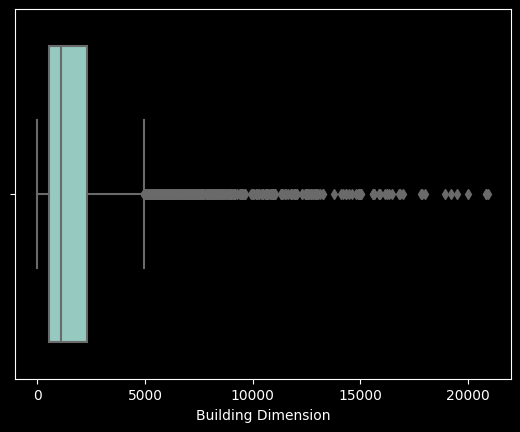

In [8]:
# Checking distribution to help decide the imputation method to use for the continous variables
sns.boxplot(x=train_df['Building Dimension'])

<Axes: xlabel='Date_of_Occupancy'>

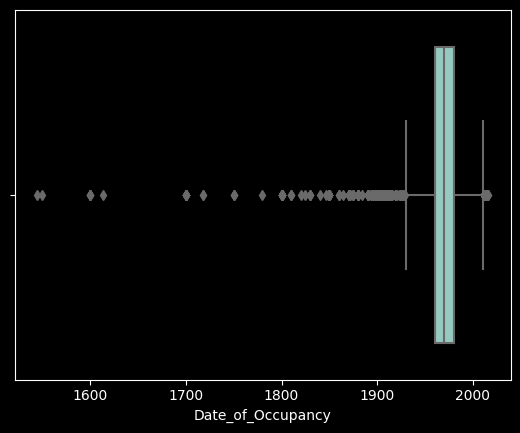

In [9]:
sns.boxplot(x=train_df['Date_of_Occupancy'])

we can deduce from the descriptive statistics that there is a possibility that building dimension and date of occupancy has an outlier

In [10]:
#We replace missing values for the building dimension and date of occupancy with Median since
#Both are highly skewed
train_df['Date_of_Occupancy'] = train_df['Date_of_Occupancy'].fillna(train_df['Date_of_Occupancy'].median())
train_df['Building Dimension'] = train_df['Building Dimension'].fillna(train_df['Building Dimension'].median())

In [11]:
#We replace the categorical variables with the mode
train_df['Garden'] = train_df['Garden'].fillna(train_df['Garden'].mode()[0])
train_df['Geo_Code'] = train_df['Geo_Code'].fillna(train_df['Geo_Code'].mode()[0])

In [12]:
train_df.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

# Exploratory Data Analysis

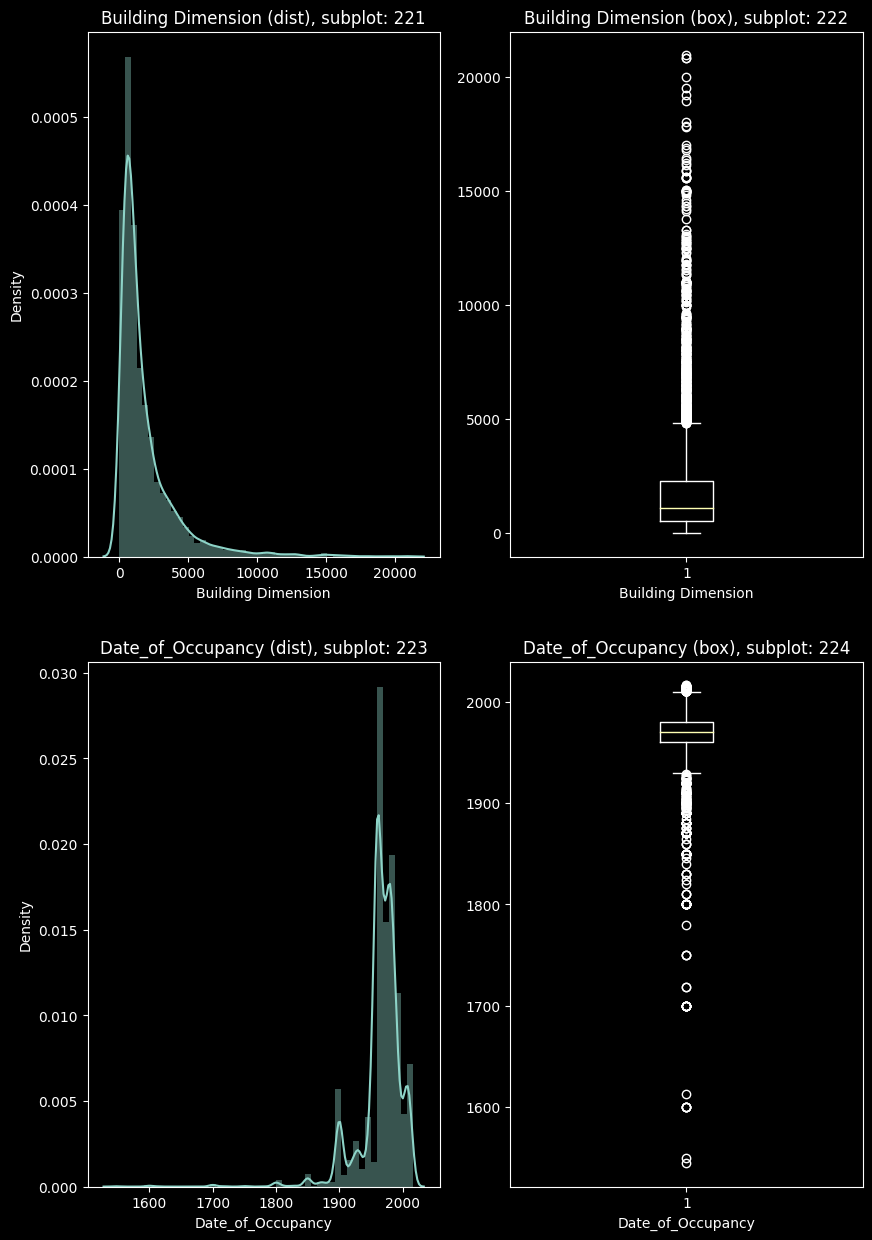

In [13]:
# Numerical Data
train_num = ['Building Dimension', 'Date_of_Occupancy']

#  plot Numerical Data
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(10, 15))

for i in train_num:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(train_df[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.boxplot(x=train_df[i])
    c = c + 1

    # plt.subplot(a, b, c)
    # plt.title('{} (scatter), subplot: {}{}{}'.format(i, a, b, c))
    # plt.xlabel(i)
    # sns.scatterplot(data = train_df, x = i, y = 'chol', hue = 'claim')
    # c = c + 1

plt.show()

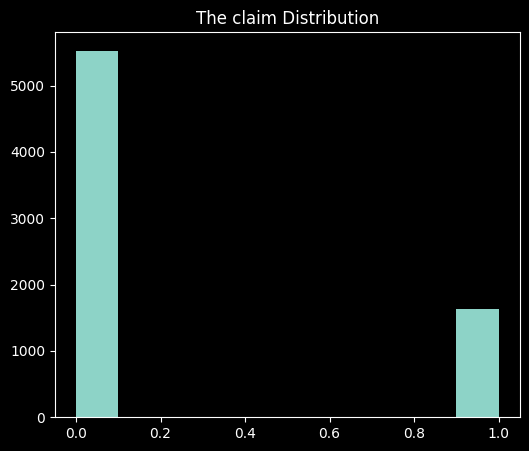

In [14]:
#The target variable distribution
fig = plt.figure(figsize=(6,5))
plt.title('The claim Distribution')
plt.hist(train_df['Claim'])
plt.show()

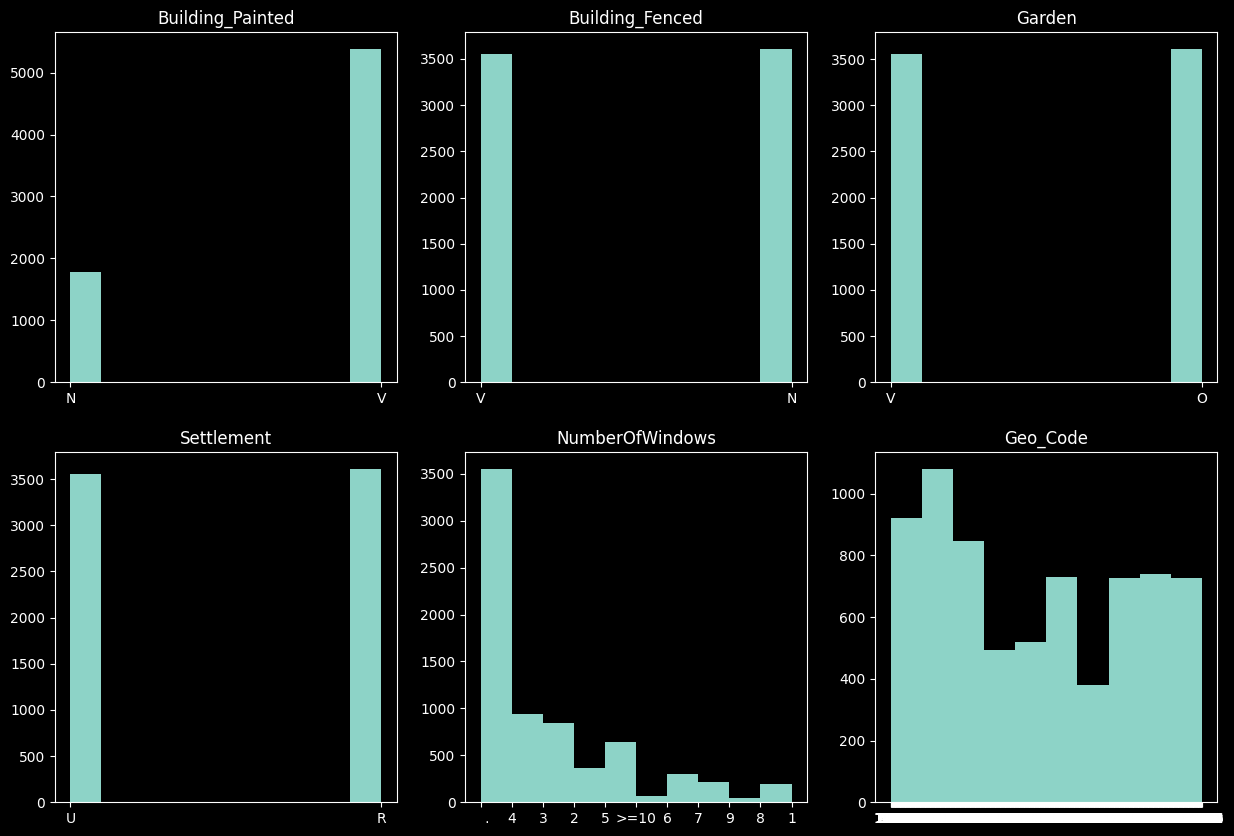

In [15]:
#Categorical Variables
train_cat = ['Building_Painted','Building_Fenced','Garden','Settlement','NumberOfWindows','Geo_Code']

#  plot Numerical Data
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))

for i in train_cat:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    #plt.xlabel(i)
    plt.hist(train_df[i])
    c = c + 1

plt.show()

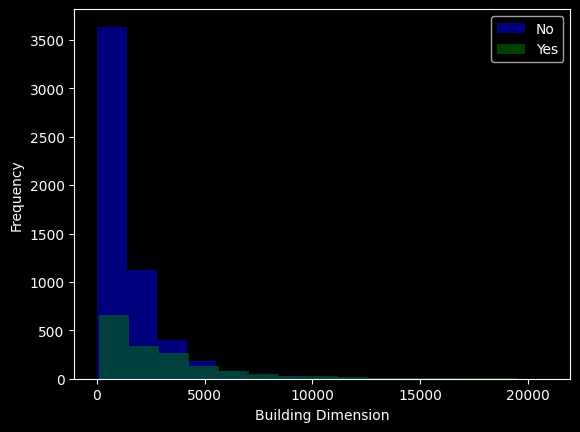

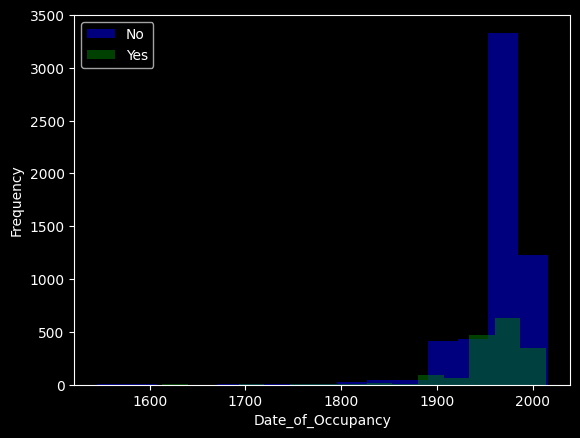

In [16]:
for i in train_num:
    
    fig, ax = plt.subplots()

    ax.hist(train_df[train_df['Claim']==0][i], bins=15, alpha=0.5, color="blue", label="No")
    ax.hist(train_df[train_df['Claim']==1][i], bins=15, alpha=0.5, color="green", label="Yes")

    ax.set_xlabel(i)
    ax.set_ylabel("Frequency")

    ax.legend()
    

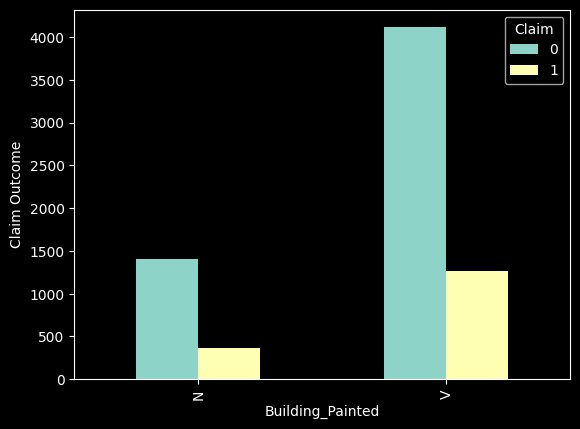

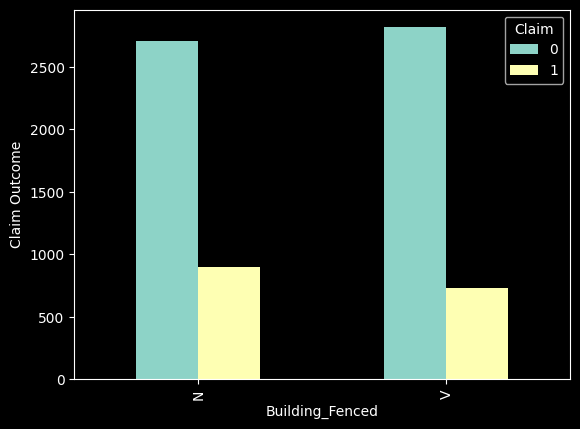

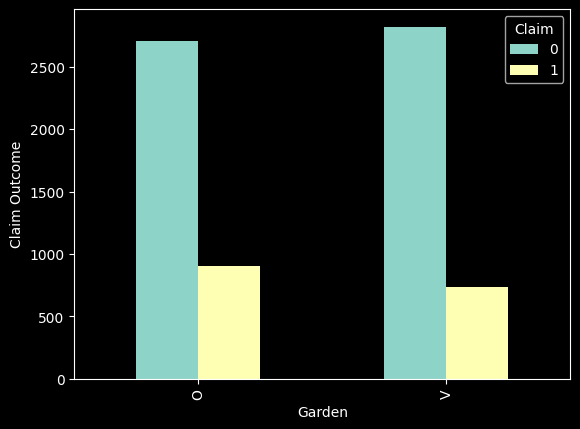

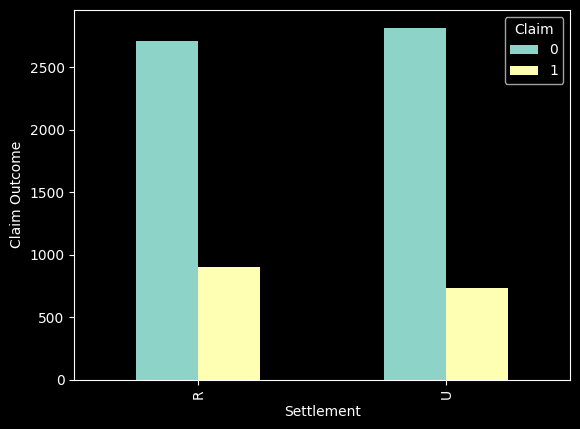

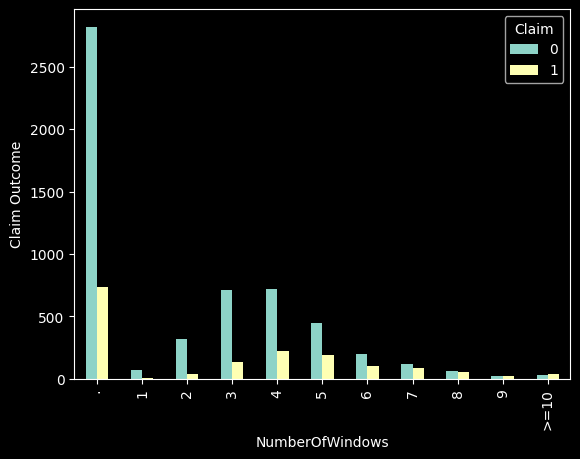

In [17]:
#Categorical Variables
train_cat = ['Building_Painted','Building_Fenced','Garden','Settlement','NumberOfWindows']

for i in train_cat:

    pd.crosstab(train_df[i], train_df.Claim).plot(kind = 'bar')
    plt.xlabel('{}'.format(i))
    plt.ylabel('Claim Outcome')
    
plt.show()

Insights
 > Possibility of class imbalance
 
 > Skewed data for building dimension and date of occupancy

# Feature Engineering

In [18]:
#Dealing with outliers
#Experiment with the removal of outliers and non_removal of outliers
# Option 1: No removal of outliers
#Create a copy of the train dataset
train_df_copy = train_df.copy()

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7160 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7160 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [20]:
#Encoding of categorical variables We use Label Encoder
train_df['Building_Painted'] = train_df['Building_Painted'].replace(['N','V'],[1,0])
train_df['Building_Fenced'] = train_df['Building_Fenced'].replace(['N','V'],[1,0])
train_df['Garden'] = train_df['Garden'].replace(['V','O'],[1,0])
train_df['Settlement'] = train_df['Settlement'].replace(['R','U'],[0,1])
train_df['Building_Type'] = train_df['Building_Type'].replace([1,2,3,4],[0,1,2,3])

In [21]:
train_df['NumberOfWindows'] = train_df['NumberOfWindows'].replace(['   .','>=10'],['',10])

In [21]:
train_df['NumberOfWindows'] = train_df['NumberOfWindows'].replace(['1','2','3','4','5','6','7','8','9',10],[0,1,2,3,4,5,6,7,8,9])

In [22]:
train_df.head(5)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,1,0,1,1,290.0,0,1960.0,,1053,0
1,H2037,2015,1.0,0,0,1,0,0,490.0,0,1850.0,4,1053,0
2,H3802,2014,1.0,0,1,0,1,1,595.0,0,1960.0,,1053,0
3,H3834,2013,1.0,0,0,0,1,1,2840.0,0,1960.0,,1053,0
4,H5053,2014,1.0,0,0,1,0,0,680.0,0,1800.0,3,1053,0


In [23]:
#train_df = train_df.drop(columns=['Customer Id'])
train_df_le = train_df

In [24]:
#With One Hot Encoder and no removal of outliers
train_df_he = train_df_copy.copy()

In [25]:
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7160 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7160 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [26]:
#Checking cardinality (Number of unique values in a column)
# Get a list of the categorical variables

object_cols = [col for col in train_df_he.columns if train_df_he[col].dtype == "object"]

# Get number of unique entries in each column with categorical data

object_nunique = list(map(lambda col: train_df_he[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order

sorted(d.items(), key=lambda x: x[1])

[('Building_Painted', 2),
 ('Building_Fenced', 2),
 ('Garden', 2),
 ('Settlement', 2),
 ('NumberOfWindows', 11),
 ('Geo_Code', 1307),
 ('Customer Id', 7160)]

In [27]:
cat_vars = ['Building_Painted','Building_Fenced','Garden','Settlement','NumberOfWindows']

for var in cat_vars:
    cat_list = 'var' + '_' + 'var'
    cat_list = pd.get_dummies(train_df_he[var], prefix=var)
    train_df_he_New = pd.concat([train_df_he,cat_list],axis = 1)
    train_df_he = train_df_he_New

data_vars = train_df_he.columns.values.tolist()

to_keep = [i for i in data_vars if i not in cat_vars]

train_df_he_final = train_df_he[to_keep]

train_df_he_final.columns.values

array(['Customer Id', 'YearOfObservation', 'Insured_Period',
       'Residential', 'Building Dimension', 'Building_Type',
       'Date_of_Occupancy', 'Geo_Code', 'Claim', 'Building_Painted_N',
       'Building_Painted_V', 'Building_Fenced_N', 'Building_Fenced_V',
       'Garden_O', 'Garden_V', 'Settlement_R', 'Settlement_U',
       'NumberOfWindows_   .', 'NumberOfWindows_1', 'NumberOfWindows_2',
       'NumberOfWindows_3', 'NumberOfWindows_4', 'NumberOfWindows_5',
       'NumberOfWindows_6', 'NumberOfWindows_7', 'NumberOfWindows_8',
       'NumberOfWindows_9', 'NumberOfWindows_>=10'], dtype=object)

In [28]:
train_he_df = train_df_he_final.drop(columns=['Customer Id','NumberOfWindows_   .'])

In [29]:
train_df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   int64  
 5   Building_Fenced     7160 non-null   int64  
 6   Garden              7160 non-null   int64  
 7   Settlement          7160 non-null   int64  
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7160 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 783.2+ KB


In [30]:
train_df_le['NumberOfWindows'] = pd.to_numeric(train_df_le['NumberOfWindows'])

In [31]:
#Print all the rows where the geo-code has a letter 
#print(train_df_le[train_df_le.Geo_Code.str.contains(r'[A-Z]')])

#Remove all rows where the Geo Code has a Letter Character (Prevents conversion from string to Numeric)

train_df_le_trial = train_df_le.drop(train_df_le[train_df_le.Geo_Code.str.contains(r'[A-Z]')].index)

In [32]:
train_df_le_trial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7092 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7092 non-null   object 
 1   YearOfObservation   7092 non-null   int64  
 2   Insured_Period      7092 non-null   float64
 3   Residential         7092 non-null   int64  
 4   Building_Painted    7092 non-null   int64  
 5   Building_Fenced     7092 non-null   int64  
 6   Garden              7092 non-null   int64  
 7   Settlement          7092 non-null   int64  
 8   Building Dimension  7092 non-null   float64
 9   Building_Type       7092 non-null   int64  
 10  Date_of_Occupancy   7092 non-null   float64
 11  NumberOfWindows     3552 non-null   float64
 12  Geo_Code            7092 non-null   object 
 13  Claim               7092 non-null   int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 831.1+ KB


In [33]:
train_df_le_trial['Geo_Code'] = pd.to_numeric(train_df_le_trial['Geo_Code'])

In [34]:
train_df_le_trial.isnull().sum()

Customer Id              0
YearOfObservation        0
Insured_Period           0
Residential              0
Building_Painted         0
Building_Fenced          0
Garden                   0
Settlement               0
Building Dimension       0
Building_Type            0
Date_of_Occupancy        0
NumberOfWindows       3540
Geo_Code                 0
Claim                    0
dtype: int64

In [35]:
#Since number of windows has almost half plus missing values we drop it as replacing with mode would introduce a bias
train_df_le = train_df_le_trial
train_df_le = train_df_le.drop(columns = ['Customer Id','NumberOfWindows'])

# Modelling with label encoding

In [36]:
#Creating features and labels and converting the data to arrays for the data done using label encoding
#Labels that we want to predict
labels_le = np.array(train_df_le['Claim'])

#Create the features by dropping the label
features_le = train_df_le.drop('Claim', axis=1)

#Save feature names for later use
feature_list_le = list(features_le.columns)

#Convert to numpy arrays
features_le = np.array(features_le)

In [37]:
#Use of k-fold for validation purposes

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

count = 1

#we use split method that will generate indices to split data into train and test sets

for train_index, test_index in kf.split(features_le,labels_le):
    print(f'Fold:{count}, Train set: {len(train_index)},Validation set:{len(test_index)}')
    count+=1

Fold:1, Train set: 5673,Validation set:1419
Fold:2, Train set: 5673,Validation set:1419
Fold:3, Train set: 5674,Validation set:1418
Fold:4, Train set: 5674,Validation set:1418
Fold:5, Train set: 5674,Validation set:1418


In [38]:
#Random Forest using Label Encoding
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), 
                        features_le, labels_le, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.7751938  0.77307963 0.77362482 0.78138223 0.77150917]
Average score: 0.77


In [39]:
#Decision Tree Classifier
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), 
                        features_le, labels_le, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.69203665 0.66737139 0.68406206 0.70028209 0.6932299 ]
Average score: 0.69


In [40]:
# Using Support Vector Machine
score = cross_val_score(svm.SVC(random_state= 42), 
                        features_le, labels_le, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.77237491 0.77167019 0.77221439 0.77221439 0.77221439]
Average score: 0.77


In [41]:
#Using Gradient Boosting Classifier
score = cross_val_score(ensemble.GradientBoostingClassifier(random_state= 42), 
                        features_le, labels_le, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.7914024  0.79210712 0.78208745 0.78913963 0.77856135]
Average score: 0.79


In [42]:
from lightgbm import LGBMClassifier
#Using LGBM Classifier
score = cross_val_score(LGBMClassifier(random_state= 42), 
                        features_le, labels_le, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.78365046 0.7914024  0.78561354 0.79619182 0.78067701]
Average score: 0.79


In [43]:
from catboost import CatBoostClassifier
#Using LGBM Classifier
score = cross_val_score(CatBoostClassifier(random_state= 42), 
                        features_le, labels_le, cv= kf, verbose=100, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Learning rate set to 0.021618
0:	learn: 0.6835017	total: 125ms	remaining: 2m 4s
1:	learn: 0.6740206	total: 141ms	remaining: 1m 10s
2:	learn: 0.6653658	total: 158ms	remaining: 52.5s
3:	learn: 0.6568662	total: 173ms	remaining: 43.2s
4:	learn: 0.6482546	total: 192ms	remaining: 38.3s
5:	learn: 0.6401658	total: 211ms	remaining: 34.9s
6:	learn: 0.6328128	total: 229ms	remaining: 32.4s
7:	learn: 0.6263321	total: 240ms	remaining: 29.8s
8:	learn: 0.6196446	total: 257ms	remaining: 28.3s
9:	learn: 0.6131579	total: 273ms	remaining: 27.1s
10:	learn: 0.6070004	total: 289ms	remaining: 26s
11:	learn: 0.6010289	total: 306ms	remaining: 25.2s
12:	learn: 0.5957849	total: 321ms	remaining: 24.4s
13:	learn: 0.5903441	total: 330ms	remaining: 23.3s
14:	learn: 0.5855456	total: 338ms	remaining: 22.2s
15:	learn: 0.5804743	total: 345ms	remaining: 21.2s
16:	learn: 0.5758832	total: 352ms	remaining: 20.4s
17:	learn: 0.5714425	total: 359ms	remaining: 19.6s
18:	learn: 0.5668746	total: 366ms	remaining: 18.9s
19:	learn: 0

# Modelling with One - Hot Encoding

In [44]:
train_df_he_trial = train_he_df.drop(train_he_df[train_he_df.Geo_Code.str.contains(r'[A-Z]')].index)

In [45]:
train_df_he_trial['Geo_Code'] = pd.to_numeric(train_df_he_trial['Geo_Code'])

In [46]:
train_df_he = train_df_he_trial

In [47]:
#Feature and label Creation 
labels_he = np.array(train_df_he['Claim'])

#Create the features by dropping the label
features_he = train_df_he.drop('Claim', axis=1)

#Save feature names for later use
feature_list_he = list(features_he.columns)

#Convert to numpy arrays
features_he = np.array(features_le)

In [48]:
#Use of k-fold for validation purposes

kf_he = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

count = 1

#we use split method that will generate indices to split data into train and test sets

for train_index, test_index in kf_he.split(features_he,labels_he):
    print(f'Fold:{count}, Train set: {len(train_index)},Validation set:{len(test_index)}')
    count+=1

Fold:1, Train set: 5319,Validation set:1773
Fold:2, Train set: 5319,Validation set:1773
Fold:3, Train set: 5319,Validation set:1773
Fold:4, Train set: 5319,Validation set:1773


In [49]:
#Random Forest using One Hot Encoding
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), 
                        features_he, labels_he, cv= kf_he, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.77326565 0.77946983 0.76480541 0.77834179]
Average score: 0.77


In [50]:
#Using Gradient Boosting Classifier
score = cross_val_score(ensemble.GradientBoostingClassifier(random_state= 42), 
                        features_he, labels_he, cv= kf_he, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.78680203 0.78680203 0.79075014 0.77777778]
Average score: 0.79


# Feature Importance Analysis

With Label Encoding

In [51]:
gbc_le = ensemble.GradientBoostingClassifier(random_state=42)
gbc_he = ensemble.GradientBoostingClassifier(random_state=42)

In [52]:
gbc_le.fit(features_le, labels_le)

GradientBoostingClassifier(random_state=42)

In [53]:
# Get numerical feature importances
importances = list(gbc_le.feature_importances_)

# List of tupples with variable and importance

feature_importances = [(feature, round(importance, 2)) for feature,
                       importance in zip(feature_list_le, importances)]


# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1],
                             reverse=True)


# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair))
 for pair in feature_importances]


Variable: Building Dimension   Importance: 0.66
Variable: Geo_Code             Importance: 0.09
Variable: Insured_Period       Importance: 0.08
Variable: Building_Type        Importance: 0.08
Variable: Date_of_Occupancy    Importance: 0.08
Variable: YearOfObservation    Importance: 0.01
Variable: Residential          Importance: 0.0
Variable: Building_Painted     Importance: 0.0
Variable: Building_Fenced      Importance: 0.0
Variable: Garden               Importance: 0.0
Variable: Settlement           Importance: 0.0


[None, None, None, None, None, None, None, None, None, None, None]

With One-hot encoding

In [54]:
gbc_he.fit(features_he, labels_he)

GradientBoostingClassifier(random_state=42)

In [55]:
#Get numerical feature importances
importances = list(gbc_he.feature_importances_)

#List of tupples with variable and importance

feature_importances = [(feature, round(importance, 2)) for feature,
                      importance in zip(feature_list_he, importances)]


#Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                            reverse = True)


#Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Building_Painted_N   Importance: 0.66
Variable: Building_Fenced_V    Importance: 0.09
Variable: Insured_Period       Importance: 0.08
Variable: Building_Painted_V   Importance: 0.08
Variable: Building_Fenced_N    Importance: 0.08
Variable: YearOfObservation    Importance: 0.01
Variable: Residential          Importance: 0.0
Variable: Building Dimension   Importance: 0.0
Variable: Building_Type        Importance: 0.0
Variable: Date_of_Occupancy    Importance: 0.0
Variable: Geo_Code             Importance: 0.0


In [56]:
print('Label Encoding Score: ', gbc_le.score(features_le, labels_le))
print('One Hot Encoding Score: ', gbc_he.score(features_he, labels_he))

Label Encoding Score:  0.8035815002820079
One Hot Encoding Score:  0.8035815002820079


Implications  Insights

> Both one hot and label encoding had the same performance across different classifiers.

> With Label encoding choosing two continous variables to be contributing to the model, we opt to go with label encoding

> This problem could probably be well fitted using a linear model (Worth Checking out)

We use XG boost with the most Important Features derived from the Label Encoding Dataset

In [57]:
data_to_model = train_df_le.loc[:,['YearOfObservation','Insured_Period','Building Dimension','Building_Type',
                                   'Date_of_Occupancy','Geo_Code','Claim']]

In [58]:
data_to_model.head(5)

,YearOfObservation,Insured_Period,Building Dimension,Building_Type,Date_of_Occupancy,Geo_Code,Claim
0,2013,1.0,290.0,0,1960.0,1053,0
1,2015,1.0,490.0,0,1850.0,1053,0
2,2014,1.0,595.0,0,1960.0,1053,0
3,2013,1.0,2840.0,0,1960.0,1053,0
4,2014,1.0,680.0,0,1800.0,1053,0


In [59]:
#Testing the model perfomance using cross validation
labels_n = np.array(data_to_model['Claim'])
#Create the features by dropping the label
features_n = data_to_model.drop('Claim', axis=1)

#Save feature names for later use
feature_list_n = list(features_n.columns)

features_n = np.array(features_n)

In [60]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

count = 1

for train_index, test_index in kf.split(features_n,labels_n):
    print(f'Fold:{count}, Train set: {len(train_index)},Test set:{len(test_index)}')
    count+=1

Fold:1, Train set: 5673,Test set:1419
Fold:2, Train set: 5673,Test set:1419
Fold:3, Train set: 5674,Test set:1418
Fold:4, Train set: 5674,Test set:1418
Fold:5, Train set: 5674,Test set:1418


In [61]:
#Random Forest After Removing Redundant variables
score = cross_val_score(ensemble.GradientBoostingClassifier(random_state= 42), 
                        features_n, labels_n, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.78928823 0.78999295 0.78208745 0.79337094 0.78138223]
Average score: 0.79


Choosing the Best Model using Grid Search Cross validation

In [62]:
#Creating the train and test sets of the new data set using scikit-learn
train_features_n, test_features_n, train_labels_n, test_labels_n = train_test_split(
features_n,labels_n, test_size = 0.2, random_state = 42)

In [63]:
#Getting the best model
model = GradientBoostingClassifier(random_state=1)
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = [2, 4, 6]
search = GridSearchCV(model,space, scoring='accuracy',cv = kf, refit=True)
result = search.fit(train_features_n, train_labels_n)

In [64]:
best_model = result.best_estimator_

In [65]:
#Evaluate the model on the hold out dataset
yhat = best_model.predict(test_features_n)

In [66]:
acc = accuracy_score(test_labels_n,yhat)
print(f'Best Model Accuracy: {"{:.3f}".format(acc)}')

Best Model Accuracy: 0.790


# Predicting the Test Data using the best Model

In [67]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3065 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3056 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   2341 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


In [66]:
#data_to_predict = test_df.loc[:,['Building Dimension','Geo_Code','Insured_Period','Building_Type',
                                   #'Date_of_Occupancy','YearOfObservation','Claim']]

In [68]:
test_df.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [69]:
new_test_df = test_df[test_df['Date_of_Occupancy'].notna()]

In [70]:
new_test_df.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    13
Building_Type          0
Date_of_Occupancy      0
NumberOfWindows        0
Geo_Code              13
dtype: int64

In [71]:
#We drop missing values for date of occupancy [Quite many]
#Replace Building Dimension NAN with median
new_test_df['Building Dimension'] = new_test_df['Building Dimension'].fillna(new_test_df['Building Dimension'].median())
#Replace categorical variables with mode
new_test_df['Garden'] = new_test_df['Garden'].fillna(new_test_df['Garden'].mode()[0])
new_test_df['Geo_Code'] = new_test_df['Geo_Code'].fillna(new_test_df['Geo_Code'].mode()[0])

In [72]:
#Label Encoding
#Encoding of categorical variables We use Label Encoder
new_test_df['Building_Painted'] = new_test_df['Building_Painted'].replace(['N','V'],[1,0])
new_test_df['Building_Fenced'] = new_test_df['Building_Fenced'].replace(['N','V'],[1,0])
new_test_df['Garden'] = new_test_df['Garden'].replace(['V','O'],[1,0])
new_test_df['Settlement'] = new_test_df['Settlement'].replace(['R','U'],[0,1])
new_test_df['Building_Type'] = new_test_df['Building_Type'].replace([1,2,3,4],[0,1,2,3])

In [73]:
#Drop the Alphanumeric characters in Geo-code
new_test_df = new_test_df.drop(new_test_df[new_test_df.Geo_Code.str.contains(r'[A-Z]')].index)

In [74]:
#Convert Geo-code into numeric
new_test_df['Geo_Code'] = pd.to_numeric(new_test_df['Geo_Code'])

In [75]:
new_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         2275 non-null   object 
 1   YearOfObservation   2275 non-null   int64  
 2   Insured_Period      2275 non-null   float64
 3   Residential         2275 non-null   int64  
 4   Building_Painted    2275 non-null   int64  
 5   Building_Fenced     2275 non-null   int64  
 6   Garden              2275 non-null   int64  
 7   Settlement          2275 non-null   int64  
 8   Building Dimension  2275 non-null   float64
 9   Building_Type       2275 non-null   int64  
 10  Date_of_Occupancy   2275 non-null   float64
 11  NumberOfWindows     2275 non-null   object 
 12  Geo_Code            2275 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 248.8+ KB


In [75]:
new_test_df.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
dtype: int64

In [76]:
#data_to_predict = test_df.loc[:,['Building Dimension','Geo_Code','Insured_Period','Building_Type',
                                   #'Date_of_Occupancy','YearOfObservation','Claim']]

In [76]:
data_to_predict = new_test_df.drop(columns=['Customer Id','Residential','Building_Painted','Building_Fenced','Garden',
                                           'Settlement','NumberOfWindows'])

In [77]:
data_to_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275 entries, 0 to 3068
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   2275 non-null   int64  
 1   Insured_Period      2275 non-null   float64
 2   Building Dimension  2275 non-null   float64
 3   Building_Type       2275 non-null   int64  
 4   Date_of_Occupancy   2275 non-null   float64
 5   Geo_Code            2275 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 124.4 KB


In [78]:
#Convert the test data into an array
test_array = np.array(data_to_predict)

In [79]:
#Predicted Claim Status
predicted_values = best_model.predict(test_array)

In [80]:
predicted_values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
#Convert the predicted values to an dataframe
predicted_df = pd.DataFrame(predicted_values, columns=['Claim'])

In [82]:
#Get the count of the predicted values
predicted_df['Claim'].value_counts()

0    2102
1     173
Name: Claim, dtype: int64

In [83]:
#Creat a dataframe for the customer id
col = ['Customer Id']
customer_id_df = new_test_df[col]

In [84]:
predicted_df_final= pd.concat([customer_id_df,predicted_df], axis=1)

In [85]:
predicted_df_final.head(5)

,Customer Id,Claim
0,H11920,0.0
1,H11921,0.0
2,H9805,0.0
3,H7493,0.0
4,H7494,0.0


In [ ]:
#Export the dataframe of predicted values to a csv file
predicted_df_final.to_csv('predicted.csv', index=False)